In [1]:
from google.colab import files
uploaded = files.upload()


Saving AEP_hourly.csv to AEP_hourly.csv


In [4]:
! pip install autoviml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 3.9 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of imbalanced-ensemble to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.6/134.6 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 746.5/746.5 kB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 99.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 78.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
df = pd.read_csv("/content/AEP_hourly.csv")

In [3]:
df.head()

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


In [4]:
df = df.set_index('Datetime')

In [5]:
color_pal = sns.color_palette()

<Axes: title={'center': 'PJME energyUse in MW'}, xlabel='Datetime'>

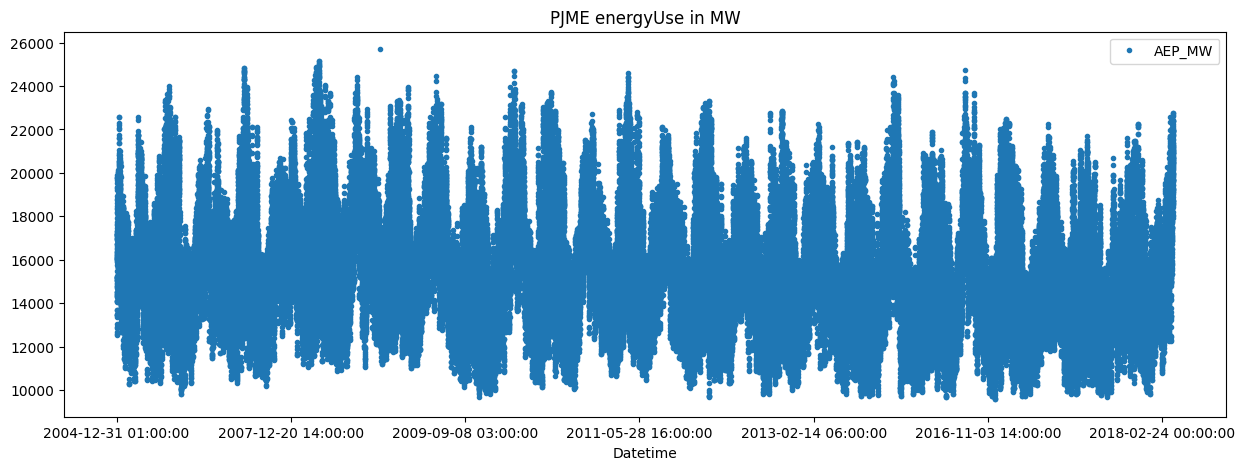

In [6]:
df.plot(style=".", figsize=(15,5), color=color_pal[0], title ="PJME energyUse in MW")

In [7]:
df.index = pd.to_datetime(df.index)

<Axes: title={'center': 'PJME energyUse in MW'}, xlabel='Datetime'>

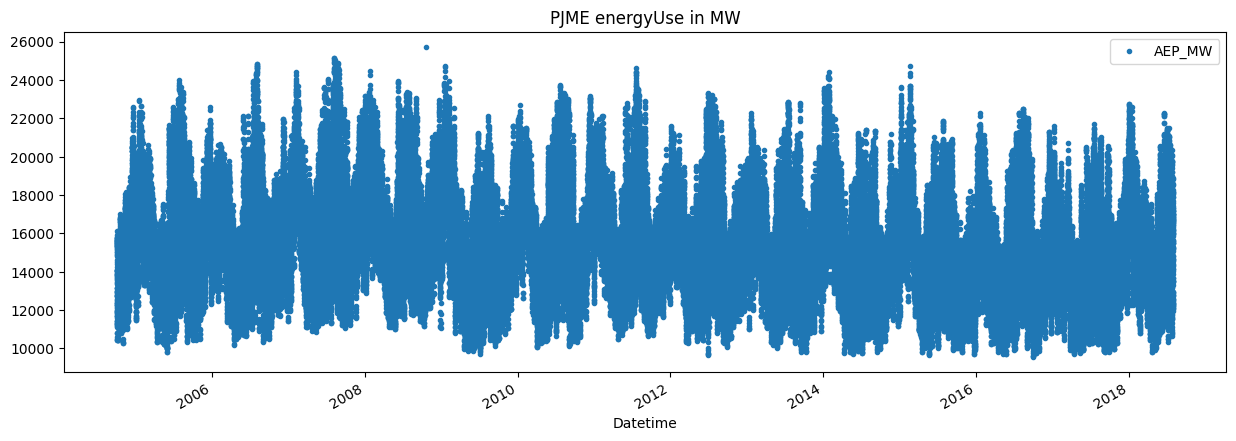

In [8]:
df.plot(style=".", figsize=(15,5), color=color_pal[0], title ="PJME energyUse in MW")

In [9]:
train = df.loc[df.index < '01-01-2015']
test = df.loc[df.index >= '01-01-2015']

In [10]:
train.tail()

,AEP_MW
Datetime,
2014-01-01 20:00:00,16433.0
2014-01-01 21:00:00,16376.0
2014-01-01 22:00:00,16151.0
2014-01-01 23:00:00,15687.0
2014-01-02 00:00:00,15201.0


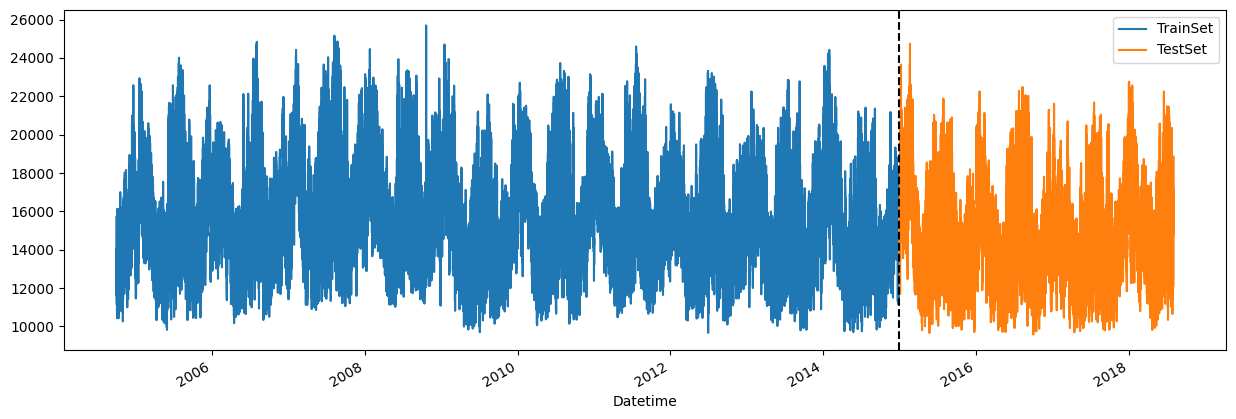

In [11]:
fig, ax = plt.subplots(figsize=(15,5))
train.plot(ax=ax, label="Train set")
test.plot(ax=ax, label="Test set")
ax.axvline('01-01-2015', color='black', ls='--')
ax.legend (["TrainSet","TestSet"])

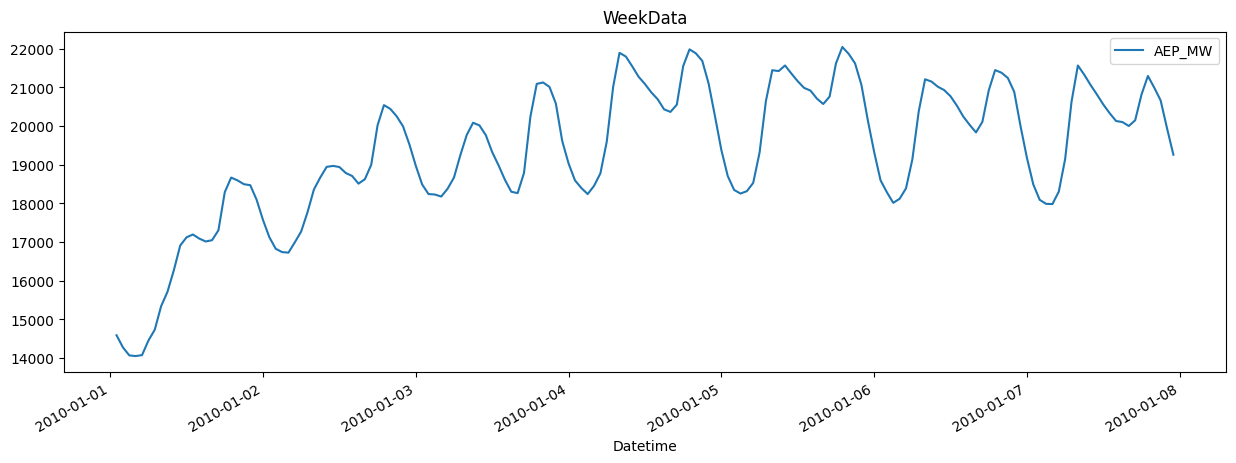

In [12]:
df.loc[(df.index > '01-01-2010') & (df.index < '01-08-2010')].plot(figsize=(15,5), title='WeekData')
plt.show()

In [13]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

df = create_features(df)

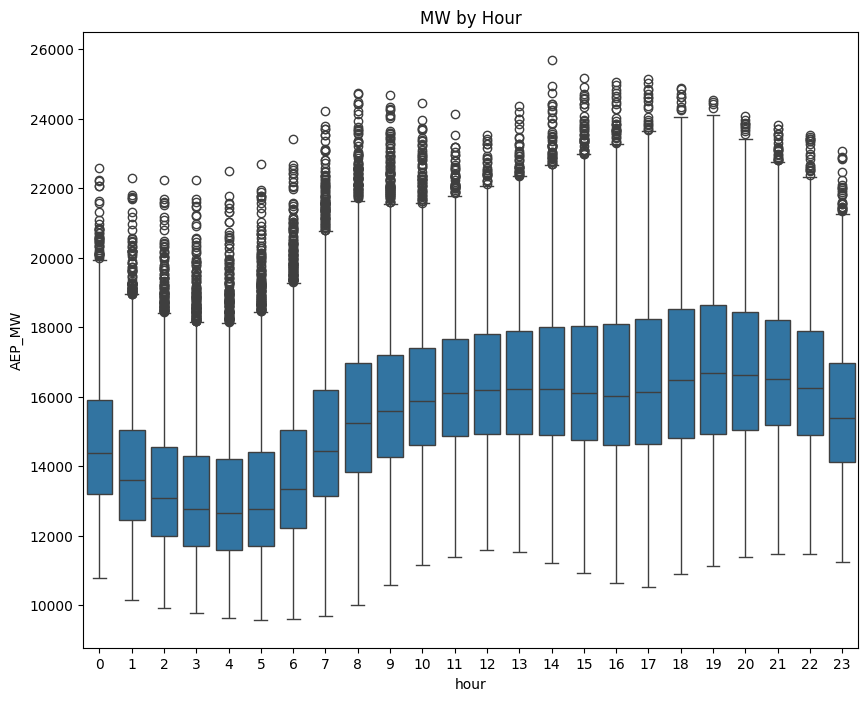

In [14]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='hour', y='AEP_MW')
ax.set_title('MW by Hour')
plt.show()

/tmp/ipykernel_1296/3087536141.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='month', y='AEP_MW', palette='Blues')


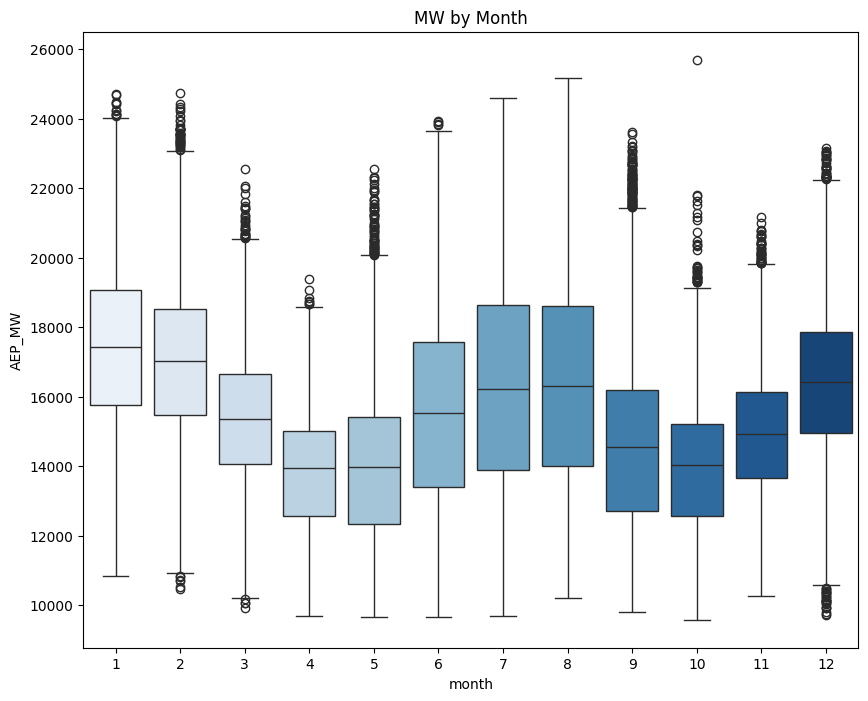

In [15]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='month', y='AEP_MW', palette='Blues')
ax.set_title('MW by Month')
plt.show()

In [16]:
from autoviml.Auto_ViML import Auto_ViML


target_column = 'AEP_MW'

# Initialize AutoVIML model
model, best_features, trainm, testm = Auto_ViML(
    train=train,
    target=target_column,
    test="",
    sample_submission="",
    hyper_param="RS",  # Randomized Search for faster results
    feature_reduction=True,  # Enable feature reduction
    scoring_parameter="rmse",  # Root Mean Squared Error for regression task
    Boosting_Flag=True,  # Use boosting models like XGBoost or LightGBM
    verbose=2  # Set verbosity level to see detailed output
)

ImportError: cannot import name 'interp' from 'scipy' (/usr/local/lib/python3.10/dist-packages/scipy/__init__.py)

In [17]:
import sys
from scipy.interpolate import interp1d

# Monkey patch scipy to include interp
sys.modules['scipy'].interp = interp1d

In [19]:
train = create_features(train)
test = create_features(test)

FEATURES = ['dayofyear', 'hour', 'dayofweek', 'quarter', 'month', 'year']
TARGET = 'AEP_MW'

In [23]:
from autoviml.Auto_ViML import Auto_ViML
from scipy.interpolate import interp1d

target_column = 'AEP_MW'

# Initialize AutoVIML model
# The original code was trying to unpack 4 values
# but Auto_ViML function returns only one value when test is set to "".
# Changed to receive only one value to fix the error
# FIX: Pass the test DataFrame to the 'test' parameter and handle potential errors
try:
    model = Auto_ViML(
        train=train,
        target=target_column,
        test=test,  # Pass the test DataFrame here
        sample_submission="",
        hyper_param="RS",  # Randomized Search for faster results
        feature_reduction=True,  # Enable feature reduction
        scoring_parameter="rmse",  # Root Mean Squared Error for regression task
        Boosting_Flag=True,  # Use boosting models like XGBoost or LightGBM
        verbose=2  # Set verbosity level to see detailed output
    )
    # Access the other returned values like this:
    best_features = model.best_features_
    trainm = model.trainm_
    testm = model.testm_  # Will be the predictions on the test data
except Exception as e:
    print(f"An error occurred during Auto_ViML execution: {e}")
    # Add debugging information or alternative handling here, e.g., print model
    print(f"Model: {model}")

==================== System Information ====================
System: Linux
Node Name: 92cbba9c5db9
Release: 6.1.85+
Version: #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
Machine: x86_64
Processor: x86_64
====================== CPU Information ======================
Physical cores: 1
Total cores: 2
==================== Memory Information ====================
Total: 12.67GB
Available: 10.69GB
Used: 1.68GB
##############  D A T A   S E T  A N A L Y S I S  #######################
ALERT! Changing hyperparameter search to RS. Otherwise XGBoost will take too long for 10,000+ rows.
Training Set Shape = (89833, 9)
    Training Set Memory Usage = 8.61 MB
Test Set Shape = (31440, 9)
    Test Set Memory Usage = 3.32 MB
Single_Label Target: ['AEP_MW']
No shuffling of data set before training...
    Using RandomizedSearchCV for Hyper Parameter Tuning. This is 3X faster than GridSearchCV...
#######################################################################################
################

In [25]:
train = create_features(train)
test = create_features(test)

FEATURES = ['dayofyear', 'hour', 'dayofweek', 'quarter', 'month', 'year']
TARGET = 'AEP_MW'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [26]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[08:20:00] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:15793.26062	validation_1-rmse:14861.30187
[100]	validation_0-rmse:6033.90962	validation_1-rmse:5144.92812
[200]	validation_0-rmse:2702.85176	validation_1-rmse:2158.50791
[300]	validation_0-rmse:1754.98214	validation_1-rmse:1666.22808
[396]	validation_0-rmse:1521.45476	validation_1-rmse:1657.05964


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=50, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, objective='reg:linear',
             predictor='auto', random_state=0, reg_alpha=0, ...)

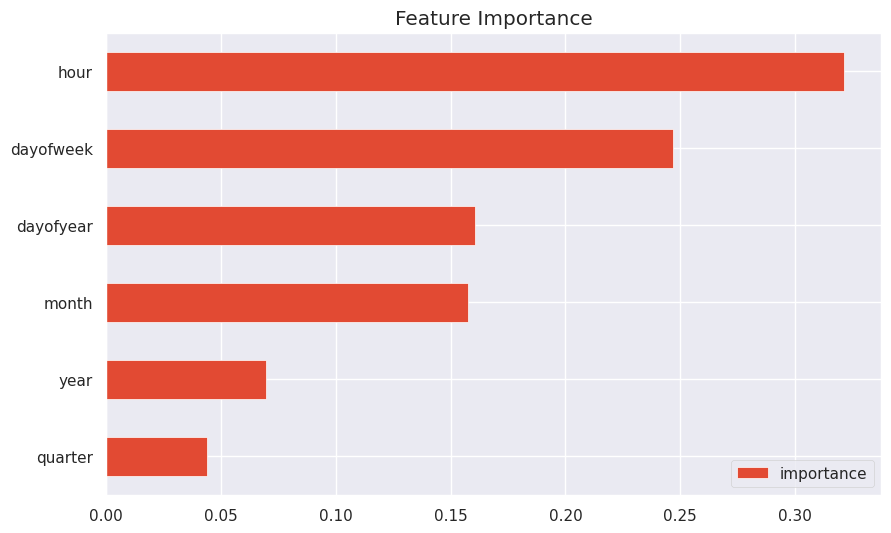

In [27]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

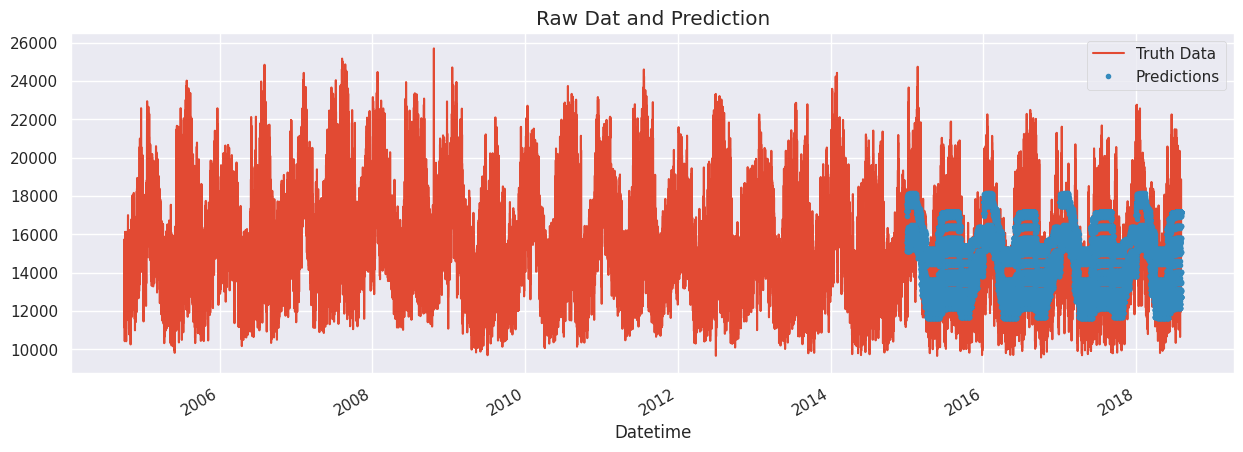

In [34]:
test['prediction'] = reg.predict(X_test)
df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = df[['AEP_MW']].plot(figsize=(15, 5))
df['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()

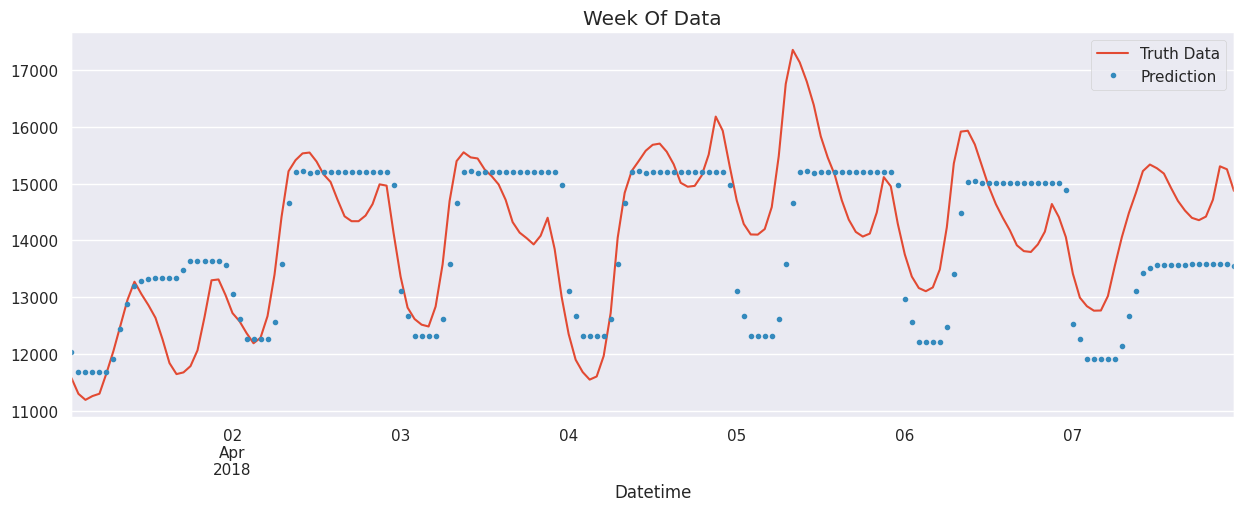

In [36]:
ax = df.loc[(df.index > '04-01-2018') & (df.index < '04-08-2018')]['AEP_MW'] \
    .plot(figsize=(15, 5), title='Week Of Data')
df.loc[(df.index > '04-01-2018') & (df.index < '04-08-2018')]['prediction'] \
    .plot(style='.')
plt.legend(['Truth Data','Prediction'])
plt.show()

In [39]:
from sklearn.metrics import mean_squared_error


In [40]:
score = np.sqrt(mean_squared_error(test['AEP_MW'], test['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 1649.06
